In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinic_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
# merge these two datasets together
clinical_data_complete = pd.merge(clinic_data, mouse_data, how = "outer")

# Display the data table for preview
clinical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = clinical_data_complete.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
TR = pd.DataFrame(grouped_data["Tumor Volume (mm3)"].mean()).reset_index()
# Preview DataFrame
TR.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
# in one line
error = pd.DataFrame(grouped_data.sem()["Tumor Volume (mm3)"]).reset_index()
error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
grouped_data1 = clinical_data_complete.groupby("Drug") # to use the index as df column names
grouped_data2 = clinical_data_complete.groupby("Timepoint") # to use the index as df index
results = [] # a blank list
for drug in grouped_data1.first().index:
    results.append(TR.loc[TR["Drug"]==drug,"Tumor Volume (mm3)"])
munged_df = pd.DataFrame(zip(*results), index = grouped_data2.first().index, columns = grouped_data1.first().index)
#munged_df = pd.DataFrame(TR.loc[TR["Drug"]=="Capomulin", "Tumor Volume (mm3)"] for drug in grouped_data1.first().index)
# Preview that Reformatting worked
munged_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


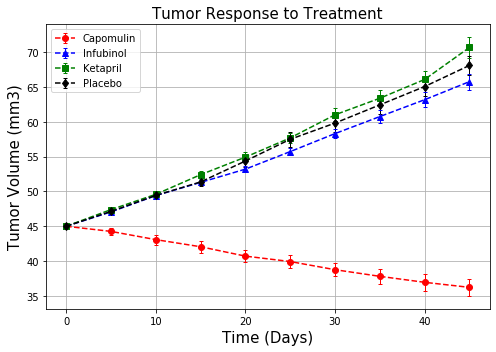

In [5]:
# Generate the Plot (with Error Bars)
timepoint = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize = (7,5))
#plt.plot(timepoint, munged_df["Capomulin"], 'ro--', label = "Capomulin")
plt.errorbar(timepoint, munged_df["Capomulin"], yerr = error.loc[error["Drug"]=="Capomulin", "Tumor Volume (mm3)"],fmt = 'ro--', label = "Capomulin", ecolor='r',elinewidth=1,capsize=2)
#plt.plot(timepoint,munged_df['Infubinol'], "b^--", label = "Infubinol")
plt.errorbar(timepoint, munged_df["Infubinol"], yerr = error.loc[error["Drug"]=="Infubinol", "Tumor Volume (mm3)"],fmt = 'b^--', label = "Infubinol", ecolor='b',elinewidth=1,capsize=2)
#plt.plot(timepoint,munged_df["Ketapril"], "gs--", label = "Ketapril")
plt.errorbar(timepoint, munged_df["Ketapril"], yerr = error.loc[error["Drug"]=="Ketapril", "Tumor Volume (mm3)"],fmt = 'gs--', label = "Ketapril", ecolor='g',elinewidth=1,capsize=2)
#plt.plot(timepoint,munged_df['Placebo'], "kd--", label = "Placebo")
plt.errorbar(timepoint, munged_df["Placebo"], yerr = error.loc[error["Drug"]=="Placebo", "Tumor Volume (mm3)"],fmt = 'kd--', label = "Placebo", ecolor='k',elinewidth=1,capsize=2)
plt.legend(loc = "best")
plt.grid()
plt.title("Tumor Response to Treatment", fontsize = 15)
plt.xlabel("Time (Days)", fontsize = 15)
plt.ylabel("Tumor Volume (mm3)", fontsize = 15)
plt.tight_layout()
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = grouped_data["Metastatic Sites"].mean()
# Convert to DataFrame
MR = pd.DataFrame(mean_met)
# Preview DataFrame
MR.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
error_met = grouped_data.sem()["Metastatic Sites"]
# Convert to DataFrame
error_met_df = pd.DataFrame(error_met)
# Preview DataFrame
error_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
# reset_index of MR dataframe
MR = MR.reset_index()
results = [] # a blank list
for drug in grouped_data1.first().index:
    results.append(MR.loc[MR["Drug"]==drug,"Metastatic Sites"])
munged_df2 = pd.DataFrame(zip(*results), index = grouped_data2.first().index, columns = grouped_data1.first().index)
# Preview that Reformatting worked
munged_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


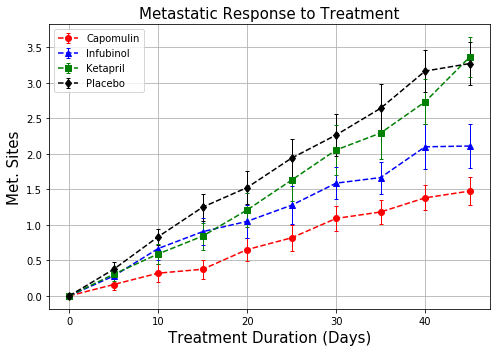

In [9]:
# Generate the Plot (with Error Bars)
# reset_index of error_met data frame
error_met = error_met.reset_index()
plt.figure(figsize = (7,5))
plt.errorbar(timepoint, munged_df2["Capomulin"], yerr = error_met.loc[error_met["Drug"]=="Capomulin", "Metastatic Sites"],fmt = 'ro--', label = "Capomulin", ecolor='r',elinewidth=1,capsize=2)
plt.errorbar(timepoint, munged_df2["Infubinol"], yerr = error_met.loc[error_met["Drug"]=="Infubinol", "Metastatic Sites"],fmt = 'b^--', label = "Infubinol", ecolor='b',elinewidth=1,capsize=2)
plt.errorbar(timepoint, munged_df2["Ketapril"], yerr = error_met.loc[error_met["Drug"]=="Ketapril", "Metastatic Sites"],fmt = 'gs--', label = "Ketapril", ecolor='g',elinewidth=1,capsize=2)
plt.errorbar(timepoint, munged_df2["Placebo"], yerr = error_met.loc[error_met["Drug"]=="Placebo", "Metastatic Sites"],fmt = 'kd--', label = "Placebo", ecolor='k',elinewidth=1,capsize=2)
plt.legend(loc = "best")
plt.grid()
plt.title("Metastatic Response to Treatment", fontsize = 15)
plt.xlabel("Treatment Duration (Days)", fontsize = 15)
plt.ylabel("Met. Sites", fontsize = 15)
plt.tight_layout()
# Save the Figure
plt.savefig("Metastatic Response to Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = grouped_data["Mouse ID"].count()
# Convert to DataFrame
SR = pd.DataFrame(mice_count).rename(columns = ({"Mouse ID":"Mouse Count"})).reset_index()
# Preview DataFrame
SR.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
results = [] # a blank list
for drug in grouped_data1.first().index:
    results.append(SR.loc[SR["Drug"]==drug,"Mouse Count"])
munged_df3 = pd.DataFrame(zip(*results), index = grouped_data2.first().index, columns = grouped_data1.first().index)

# Preview the Data Frame
munged_df3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


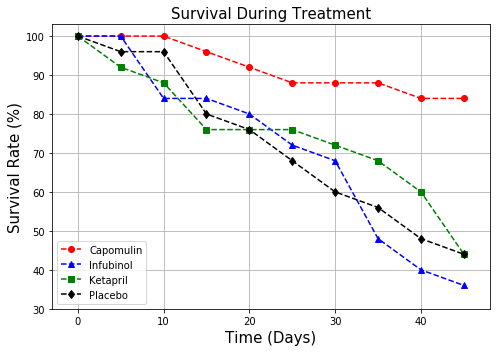

In [12]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (7,5))
treatments = {"Capomulin":"ro--", "Infubinol":"b^--","Ketapril":"gs--","Placebo":"kd--"}
for key, value in treatments.items():
    plt.plot(timepoint, munged_df3[key]/munged_df3[key][0]*100, value, label = key)
plt.legend(loc = "best")
plt.grid()
plt.title("Survival During Treatment", fontsize = 15)
plt.xlabel("Time (Days)", fontsize = 15)
plt.ylabel("Survival Rate (%)", fontsize = 15)
plt.xlim(-3, 48)
plt.ylim(30,103)
plt.tight_layout()
# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent = pd.Series()
for key in munged_df.keys():
    percent[key] = ((munged_df[key].iloc[-1]-munged_df[key].iloc[0])/munged_df[key].iloc[0]*100)
# Display the data to confirm
percent.index.name = "Drug" # assign a name to the index
percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

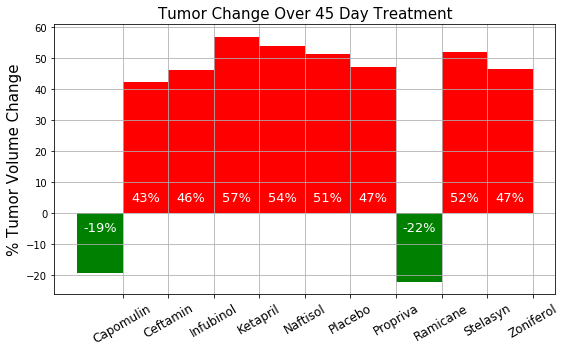

In [14]:
# Store all Relevant Percent Changes into a Tuple
percentage = tuple(percent)

# Splice the data between passing and failing drugs
#pass_drug = percent[percent>0]
#fail_drug = percent[percent<0]

treatment = percent.index # store the treatment names as labels

# Orient widths. Add labels, tick marks, etc. 
fig = plt.figure(figsize = (8,5))
plt.bar(np.arange(len(treatment)),percent, color = ["red" if x > 0 else "green" for x in percent], align = "edge",width = -1)
#plt.bar(np.arange(len(treatment)),fail_drug, align = "edge",width = -1.5)
plt.xticks(np.arange(len(treatment)),treatment,rotation = 30, fontsize = 12)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment", fontsize = 15)
plt.ylabel("% Tumor Volume Change", fontsize = 15)
plt.tight_layout()

# Use functions to label the percentages of changes
for x, y in zip(np.arange(len(treatment)),percent):
    if y > 0:
        plt.text(x-0.5,3,"%.0f%%"%y,ha = "center", va = "bottom", color = "white", fontsize =13)
    else:
        plt.text(x-0.5,-7,"%.0f%%"%y, ha = "center", va = "bottom", color = "white", fontsize = 13)
# Call functions to implement the function calls


# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
fig.show()


# Three Observations

1. Amoung the four treatments (i.e. Capomulin, Infubinol, Ketapril and Placebo), only Capomulin treatment shows the clinical effectiveness. After 45 days of treatment, the tumor volume shrinked by Capomulin treatment, while for others the tumors have grown bigger and worse. (Refer to figure 1)

2. Even though the tumor volume reduced for Capomulin treatment, tumor still spread over these 45 days, but with a slower rate compared to other treatments.(As we can see in figure 2)

3. Due to the slow metastatic speed and the shrinkage of tumor volume, the survivability of mice treated with Capomulin reveals stronger than those with other 3 treatments. (As figure 3 implies)

4. For all of these 10 treatments, only 2 treatments are proved to be successful. Treatment Ramicane reached a shrinkage of 22% in tumor volume, which is inspiring for only 45 day treatment. Capomulin is also effective. For other treatments, it seems they have made no positive effect fighting with tumors. 